<a href="https://colab.research.google.com/github/Preetraj2002/LEGO_analysis/blob/main/Lego_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson.

<img src="https://i.imgur.com/49FNOHj.jpg">


# Import Statements

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [7]:
colors_df = pd.read_csv("https://cdn.rebrickable.com/media/downloads/colors.csv.gz")
colors_df.head()

,id,name,rgb,is_trans
0,-1,[Unknown],0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [8]:
colors_df.nunique()

id          223
name        223
rgb         194
is_trans      2
dtype: int64

In [9]:
colors_df["name"].nunique()

223

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [10]:
colors_df.groupby("is_trans").count()

,id,name,rgb
is_trans,,,
f,184,184,184
t,39,39,39


In [11]:
colors_df["is_trans"].value_counts()

f    184
t     39
Name: is_trans, dtype: int64

###Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

<img src="https://i.imgur.com/aKcwkSx.png">

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src="https://i.imgur.com/whB1olq.png ">

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows.

In [31]:
sets_df = pd.read_csv("https://cdn.rebrickable.com/media/downloads/sets.csv.gz")
sets_df.head()

,set_num,name,year,theme_id,num_parts,img_url
0,001-1,Gears,1965,1,43,https://cdn.rebrickable.com/media/sets/001-1.jpg
1,0011-2,Town Mini-Figures,1979,67,12,https://cdn.rebrickable.com/media/sets/0011-2.jpg
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,https://cdn.rebrickable.com/media/sets/0011-3.jpg
3,0012-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0012-1.jpg
4,0013-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0013-1.jpg


In [32]:
sets_df.tail()

,set_num,name,year,theme_id,num_parts,img_url
21297,XWING-1,Mini X-Wing Fighter,2019,158,60,https://cdn.rebrickable.com/media/sets/xwing-1...
21298,XWING-2,X-Wing Trench Run,2019,158,52,https://cdn.rebrickable.com/media/sets/xwing-2...
21299,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413,https://cdn.rebrickable.com/media/sets/yodachr...
21300,YTERRIER-1,Yorkshire Terrier,2018,598,0,https://cdn.rebrickable.com/media/sets/yterrie...
21301,ZX8000-1,ZX 8000 LEGO Sneaker,2020,501,0,https://cdn.rebrickable.com/media/sets/zx8000-...


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [35]:
sets_df.year.min()

1949

**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [39]:
sets_df.loc[sets_df.year==sets_df.year.min()][["name",'year']]

,name,year
12973,Extra-Large Gift Set (ABB),1949
12986,Large Gift Set (ABB),1949
12991,Medium Gift Set (ABB),1949
12997,Small Brick Set (ABB),1949
12998,Small Doors and Windows Set (ABB),1949


**Challenge**: Find the top 5 LEGO sets with the most number of parts.

In [34]:
sorted_sets=sets_df.sort_values(by='num_parts',ascending=False,inplace=False)
sorted_sets.head()

,set_num,name,year,theme_id,num_parts,img_url
4270,31203-1,World Map,2021,709,11695,https://cdn.rebrickable.com/media/sets/31203-1...
399,10307-1,Eiffel Tower,2022,721,10001,https://cdn.rebrickable.com/media/sets/10307-1...
20080,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987,https://cdn.rebrickable.com/media/sets/bigbox-...
385,10294-1,Titanic,2021,721,9092,https://cdn.rebrickable.com/media/sets/10294-1...
366,10276-1,Colosseum,2020,721,9036,https://cdn.rebrickable.com/media/sets/10276-1...


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019?

In [50]:
sets_by_year = sets_df.groupby("year").count()
s=sets_by_year.set_num
s.head()

year
1949     5
1950     6
1953     4
1954    14
1955    39
Name: set_num, dtype: int64

In [52]:
s.tail()

year
2019    1016
2020    1011
2021    1140
2022     990
2023     650
Name: set_num, dtype: int64

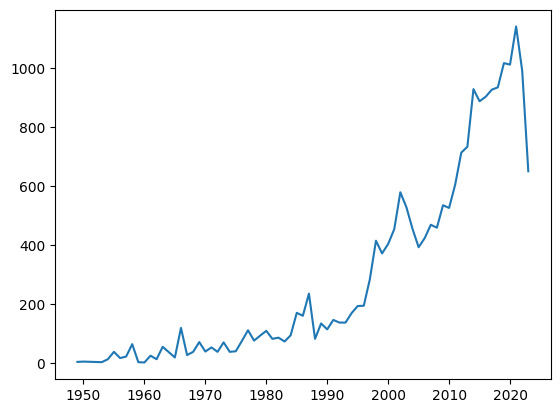

In [51]:
plt.plot(s.index,s.values)

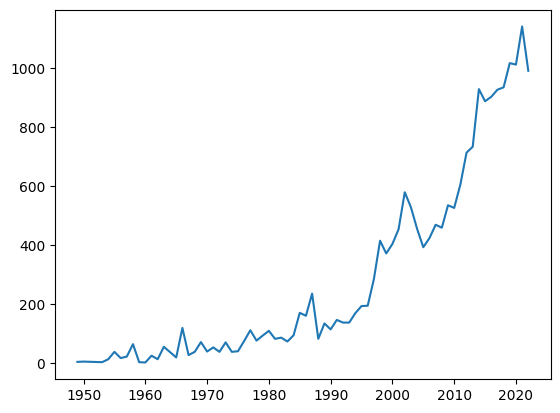

In [57]:
# removing the year 2023 as the data incomplete
plt.plot(s.index[:-1],s.values[:-1])

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [58]:
themes_by_year = sets_df.groupby("year").agg({"theme_id": pd.Series.nunique})


In [59]:
themes_by_year.rename(columns = {'theme_id':'nr_themes'},inplace = True)
themes_by_year.head()

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,6


In [61]:
themes_by_year.tail()

,nr_themes
year,
2019,95
2020,100
2021,93
2022,86
2023,78


**Challenge**: Plot the number of themes released by year on a line chart.


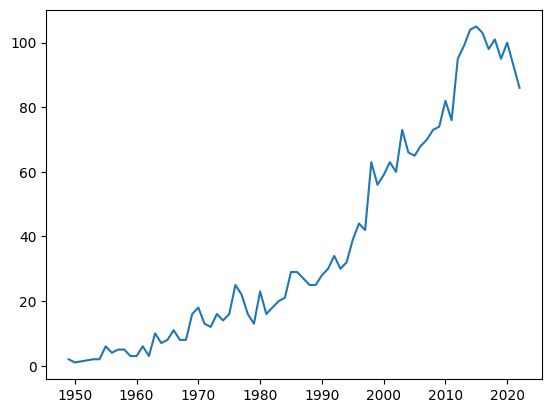

In [63]:
plt.plot(themes_by_year.index[:-1],themes_by_year.values[:-1])

### Line Charts with Two Seperate Axes

Text(0, 0.5, 'No. of Themes')

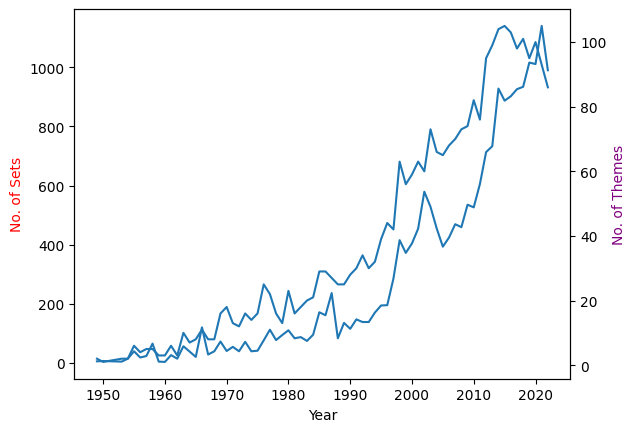

In [66]:
ax1 = plt.gca() #get the current axis
ax2 = ax1.twinx() # create another axis that shares the same x-axis

ax1.plot(sets_by_year.index[:-1],sets_by_year.set_num[:-1])
ax2.plot(themes_by_year.index[:-1],themes_by_year.nr_themes[:-1])

ax1.set_xlabel("Year")
ax1.set_ylabel("No. of Sets",color = "red")
ax2.set_ylabel("No. of Themes",color = 'purple')


**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [70]:
# parts_per_set = sets_df.groupby("year").agg({"num_parts":'mean'})
parts_per_set = sets_df.groupby("year").agg({"num_parts":pd.Series.mean})
parts_per_set.head()

,num_parts
year,
1949,99.600000
1950,1.000000
1953,12.500000
1954,8.357143
1955,12.205128


In [71]:
parts_per_set.tail()

,num_parts
year,
2019,189.011811
2020,209.780415
2021,232.871053
2022,283.667677
2023,281.010769


### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot.

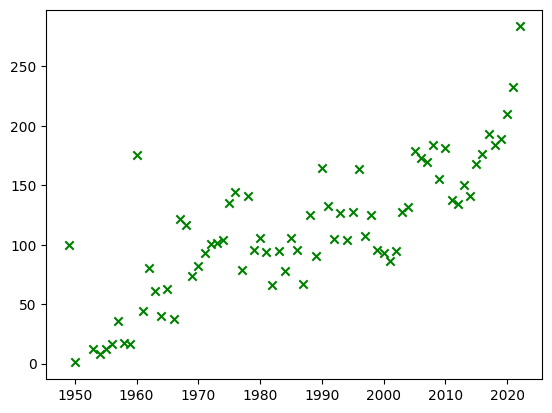

In [81]:
plt.scatter(parts_per_set.index[:-1],parts_per_set.values[:-1],c="green",marker="x")

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets?

In [83]:
set_theme_count = sets_df["theme_id"].value_counts()
set_theme_count[:5]

158    876
503    687
497    636
494    545
501    512
Name: theme_id, dtype: int64

 <img src = "https://i.imgur.com/Sg4lcjx.png">

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv.

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

### Merging (i.e., Combining) DataFrames based on a Key
